In [ ]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import nltk
import re
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

In [4]:
data1=pd.read_csv('spam.csv',encoding="ISO-8859-1")
data1

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
x = data1["v2"]
y = data1["v1"]
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

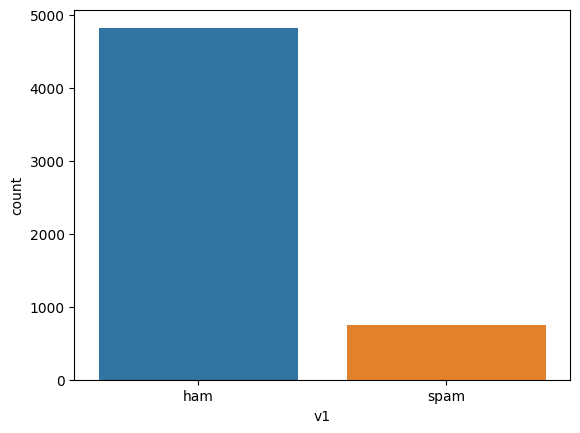

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x=data1['v1'], data=data1)
plt.show()

In [ ]:
stemmer = PorterStemmer()
corpus = []
for i in range(0, len(data1)):
    txt=  re.sub('[^a-zA-Z]', ' ', data1['v2'][i])  #removing texts other than alphabets
    txt = txt.lower()
    txt = txt.split()
    txt = [stemmer.stem(word) for word in txt if not word in stopwords.words('english')]
    txt = ' '.join(txt)
    corpus.append(txt)
# print(corpus)

In [8]:
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()
# X

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, data1['v1'], test_size = 0.20, random_state = 30)
# y_test

In [10]:
classifier = GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB()

In [11]:
# import joblib
import pickle
pickle.dump(classifier, open('spam_ham_model.pkl', 'wb'))
pickle.dump(cv, open('countVect_model.pkl', 'wb'))

In [12]:
classifier = pickle.load(open('spam_ham_model.pkl', 'rb'))
cv = pickle.load(open('countVect_model.pkl','rb'))

In [13]:
message = 'nah think goe usf live around though'
data = [message]
vect = cv.transform(data).toarray()
predict = classifier.predict(vect)
predict[0]

'ham'